--- Building WL Tree (Convergence Mode: True) ---
-> Stable convergence reached at iteration 4.

--- Validation des Résultats ---
Similar to 5 (delta=0): [6]
Similar to 5 (delta=2): [1, 6]
Similar to 5 (delta=4): [1, 2, 3, 4, 6, 7, 8]
Similar to 2 (delta=0): [8]
Similar to 1 (delta=0): []
Similar to 3 (delta=3): []

Score Similarité (1 vs 5): 0.50


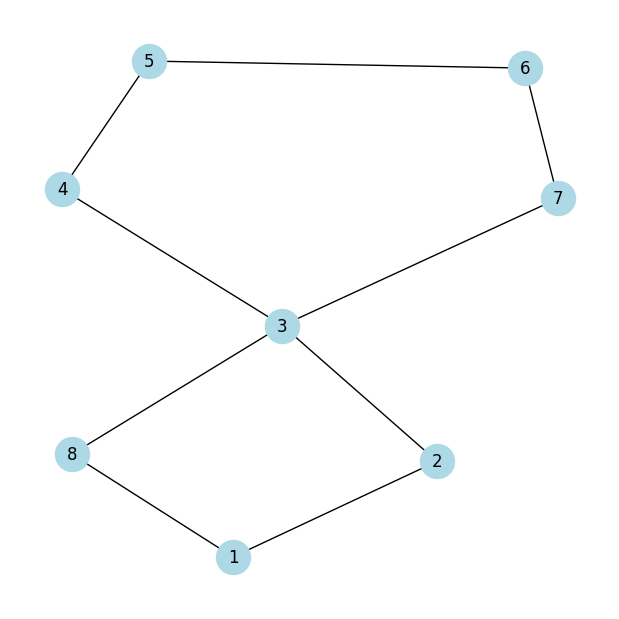

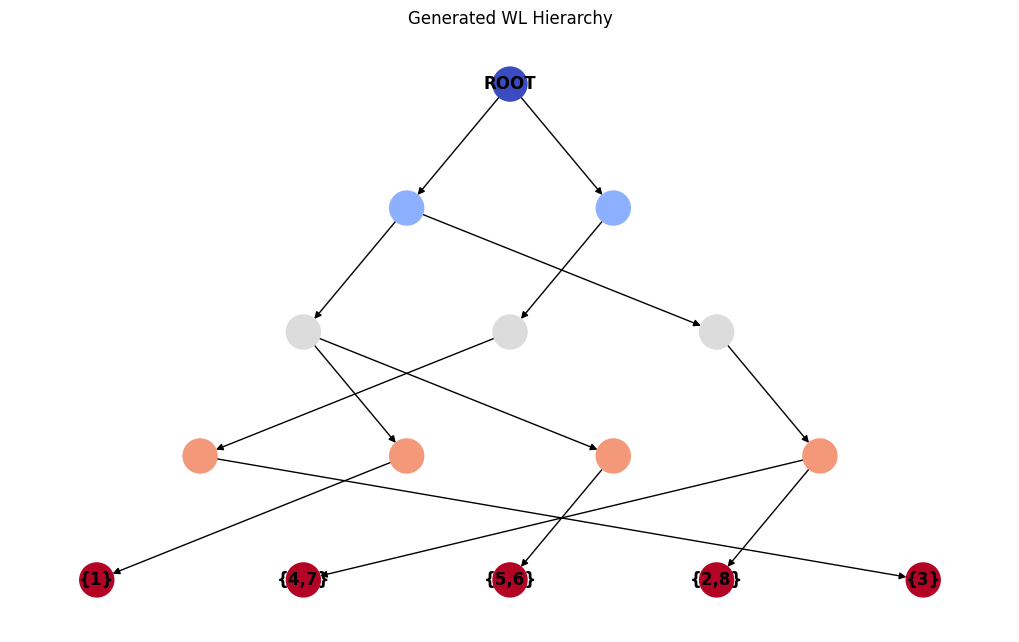

In [3]:
import networkx as nx
from wl import *
import matplotlib.pyplot as plt
# Graph exact du papier (Fig 1a)
# Attention: Les degrés sont v1(2), v2(2), v8(2), v3(4), v4(2), v7(2), v5(2), v6(2)
# Les arêtes doivent être exactes pour reproduire l'arbre.
nodes = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [
    (1, 2), (1, 8), (2, 3), (8, 3), 
    (3, 4), (3, 7), (4, 5), (7, 6), (5, 6)
]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)   # placement lisible et stable
nx.draw(G, pos, with_labels=True, node_size=600, node_color="lightblue")

engine = WLHierarchyEngine(nodes, edges)
# On force la convergence pour avoir la profondeur max (comme le papier)
engine.build_wl_tree(force_convergence=True)

print("\n--- Validation des Résultats ---")

# TEST 1: Node 5 (Bout de la boucle droite)
# Delta 0: Identité parfaite -> [6]
print(f"Similar to 5 (delta=0): {engine.get_similar_nodes(5, delta=0)}")

# Delta 2: Frères (Même parent direct). 
# Dans l'arbre profond du papier, 5 et 6 sont isolés dans leur feuille commune ou parent commun.
# Ils n'ont pas de frères proches car 1 est un Cousin.
print(f"Similar to 5 (delta=2): {engine.get_similar_nodes(5, delta=2)}")

# Delta 4: Cousins (Même Grand-Parent).
# Ici on remonte assez haut pour voir la branche de gauche (Node 1).
print(f"Similar to 5 (delta=4): {engine.get_similar_nodes(5, delta=4)}")

# TEST 2: Node 2 (Connecteur gauche)
print(f"Similar to 2 (delta=0): {engine.get_similar_nodes(2, delta=0)}")

# TEST 3: Node 1 (Bout gauche)
# Il est unique structurellement à la fin (connecté au diamant vs cycle)
print(f"Similar to 1 (delta=0): {engine.get_similar_nodes(1, delta=0)}")

# TEST 4: Node 3 (Centre)
# Unique dès le début (Degré 4)
print(f"Similar to 3 (delta=3): {engine.get_similar_nodes(3, delta=3)}")

# Score de similarité structurelle (1 et 5 sont des 'Hard Positives')
score = engine.get_structural_similarity(1, 5)
print(f"\nScore Similarité (1 vs 5): {score:.2f}")

engine.visualize_hierarchy()
